In [ ]:
# Data analysis library numpy and pandas
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
# Get the file path and file type
import mimetypes
import urllib
import os


from google.colab import drive	
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/Area/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [ ]:
class Area_plot: 
  # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # Data sorting function 
  # x_col_name:'index' or actual columns name
  # y_col_name: actual y columns name
  # sort the databy using average value,
  def sort(self,data,x_col_name,y_col_name):
    # if the x_col_name is index return sorted y columns name and new index
    if x_col_name[0] == 'index':      
      for i in y_col_name: 
        data.loc['sort',i]=data.loc[:'sort',i].mean()
      newdata=data[y_col_name].sort_values(axis=1,ascending=False,by='sort')      
      y_col_name=newdata.columns.tolist()
      y_col_name=[i for i in y_col_name if i not in x_col_name]
      data.drop(['sort'],inplace=True)
      data.index = pd.RangeIndex(start=0, stop=len(data.index), step=1) 
      return y_col_name,data.index
    else:
      for i in y_col_name:
        data.loc['sort',i]=data.loc[:'sort',i].mean()   
      newdata=pd.concat([data[x_col_name],data[y_col_name].sort_values(axis=1,ascending=False,by='sort')],axis=1)    
      newdata=data[y_col_name].sort_values(axis=1,ascending=False,by='sort')
      y_col_name=newdata.columns.tolist()
      y_col_name=[i for i in y_col_name if i not in x_col_name]
      return y_col_name

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
      file_name_new=file_name
      if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=file_name+'_'+str(n[0])
          n[0]+=1
      if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=check_meta(file_name)
      return file_name_new
    available_name=check_meta(filename)
    return available_name

  # file: file name of your data source
  # x_col_name: ['index'] or ['x_column_name_a','x_column_name_b'...]
  # y_col_name: ['y_column_name_a','y_column_name_b'...]
  # plot_type: type of plot: stack ,percentage or simple
  # paper_type : 'single' or 'double'
  def area(self, file,  x_col_name,  y_col_name, plot_type,paper_type,**kwargs):
    
    # Configuration of the line chart
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # backgrid: backgrid of the plot
    # isframe: frame of the plot
    # my_font: the typeface of x, y labels
    # linewidth: linewidth of the lines in the plot
    # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
    # labeltext_size: text size of x,y labels
    # x_label: the content of x label
    # y_label: the content of y label
    # labelpad: pad size of label
    # legend_size: size of legend
    # legend_loc: location of legend
    # legend_ncol: the legend columns number
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # Stack_colour_set: stack area chart color palette (the number of y columns <7)
    # Area_colour_set: simple area chart color palette (the number of y columns <7)
    # palette: if the number of y columns >7 in all kinds of area chart, use this color palette
    # ticks: True or False as options. If it is True, add ticks of x and y axis.
    # tick_size: size of tick 
    # tick_direction: 'out', 'inout' and 'in' options.
    # y_scale: the extra blank in y axis
    # alpha: transparency of each area
    # arealinewidth: in the simple area chart, the boundary width
    # y_col_num: the critical value of y columns in choosing color palette
    # sort: using sort function to handle data
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image

    single_column_conf={ 'plotwidth':8,#weight
                        'plotheight':6, #height
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'linewidth':2,
                        'gridlinewidth':0.5,
                        'labeltext_size':15,
                        'x_label':None,
                        'y_label':None,
                        'labelpad':10,
                        'legend_size':10,
                        'legend_loc':'upper right', 
                        'legend_ncol':2,
                        'title':False,
                        'title_pad':8,
                        'title_size':14,
                        'title_loc':'center',     
                        'Stack_colour_set':['006D77','8AA8A1','A1683A','E8998D','D1B490','EE7B30','FFCB77'],
                        'Area_colour_set':[(255/255, 173/255, 173/255),(255/255, 214/255, 165/255),(253/255, 255/255, 182/255),(202/255, 255/255, 191/255),
                                           (155/255, 246/255, 255/255),(160/255, 196/255, 255/255),(255/255, 198/255, 255/255)],
                        'palette':sns.color_palette('Set2'),
                        'ticks':True,
                        'tick_size':14,
                        'tick_direction':'out',
                        'save_image':False,
                        'y_scale':1.20,
                        'alpha':0.7,
                        'arealinewidth':1,
                        'y_col_num':7,
                        'sort':True,
                        'file_name':'area_chart',
                        'savefig_bbox_inches':'tight',
                        'file_name':'area_chart',
                        }  
    double_column_conf={ 'plotwidth':8,#weight
                        'plotheight':6, #height
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'linewidth':2,
                        'gridlinewidth':0.5,
                        'labeltext_size':25,
                        'x_label':None,
                        'y_label':None,
                        'labelpad':10,
                        'legend_size':10,
                        'legend_loc':'upper right', 
                        'legend_ncol':2,
                        'title':False,
                        'title_pad':10,
                        'title_size':20,
                        'title_loc':'center',     
                        'Stack_colour_set':['006D77','8AA8A1','A1683A','E8998D','D1B490','EE7B30','FFCB77'],
                        'Area_colour_set':[(255/255, 173/255, 173/255),(255/255, 214/255, 165/255),(253/255, 255/255, 182/255),(202/255, 255/255, 191/255),
                                           (155/255, 246/255, 255/255),(160/255, 196/255, 255/255),(255/255, 198/255, 255/255)],
                        'palette':sns.color_palette('Set2'),
                        'ticks':True,
                        'tick_size':20,
                        'tick_direction':'out',
                        'y_scale':1.20,
                        'alpha':0.7,
                        'arealinewidth':1,
                        'y_col_num':7,
                        'sort':True,
                        'save_image':False,
                        'savefig_bbox_inches':'tight',
                        'file_name':'area_chart',
                       
                        }
                         
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf                    

    # when new configuraton is set, update the original one
    conf.update(kwargs) 

    # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))

    # background grid setting
    if conf['backgrid'] == True:
      ax_left.grid(linestyle="--", linewidth=conf['gridlinewidth'], color='gray', alpha=0.5)
            
    # read file 
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')
 
 
    #plot
    #area chart type setting
    # stack area plot 
    if plot_type == 'Stack':
    # x column is index
      if x_col_name[0] =='index':  
        ydata=[]

        for i in data[y_col_name]:
            ydata.append(data[i].tolist()) 
        # determine the number of y columns is more than critical value or not
        # if yes, using the setted color palette
        if len(y_col_name)<=conf['y_col_num']:        
          ax_left.stackplot(data.index,ydata,colors=conf['Stack_colour_set'],labels=y_col_name,alpha=conf['alpha']) ##
        # if not, using the seaborn color palette
        else:
          ax_left.stackplot(data.index,ydata,colors=conf['palette'],labels=y_col_name,alpha=conf['alpha'])
        # scale y axis to get more blank            
        ax_left_ylim = ax_left.get_ylim()
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]*conf['y_scale'])

      # if x colunm is not index
      else:
        ydata=[]
        for i in data[y_col_name]:
            ydata.append(data[i].tolist()) 
        # determine the number of y columns is more than critical value or not
        # if yes, using the setted color palette
        if len(y_col_name)<=conf['y_col_num']:         
          ax_left.stackplot(data[x_col_name[0]],ydata,colors=conf['Stack_colour_set'],labels=y_col_name,alpha=conf['alpha'])
        # if not, using the seaborn color palette  
        else:
          ax_left.stackplot(data[x_col_name[0]],ydata,colors=conf['palette'],labels=y_col_name,alpha=conf['alpha'])
        # scale y axis to get more blank    
        ax_left_ylim = ax_left.get_ylim()
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]*conf['y_scale']) 
    
    # percentage area plot
    if plot_type == 'percentage':
      # x column is index
      if x_col_name[0] =='index':
        ydata=[]
        # get the percentange of each part
        data = data[y_col_name].divide(data[y_col_name].sum(axis=1), axis=0)
        for i in data[y_col_name]:
            ydata.append(data[i].tolist()) 
        # determine the number of y columns is more than critical value or not
        # if yes, using the setted color palette
        if len(y_col_name)<=conf['y_col_num']:        
          ax_left.stackplot(data.index,ydata,colors=conf['Stack_colour_set'],labels=y_col_name,alpha=conf['alpha'])
        # if not, using the seaborn color palette  
        else:
          ax_left.stackplot(data.index,ydata,colors=conf['palette'],labels=y_col_name,alpha=conf['alpha'])   
        # scale y axis to get more blank           
        ax_left_ylim = ax_left.get_ylim()
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1])
      
      # if x colunm is not index
      else:
        ydata=[]
        data = data[y_col_name].divide(data[y_col_name].sum(axis=1), axis=0)

        for i in data[y_col_name]:
          ydata.append(data[i].tolist()) 
        if len(y_col_name)<=conf['y_col_num']:         
          ax_left.stackplot(data[x_col_name[0]],ydata,colors=conf['Stack_colour_set'],labels=y_col_name,alpha=conf['alpha'])
            
        else:
          ax_left.stackplot(data[x_col_name[0]],ydata,colors=conf['palette'],labels=y_col_name,alpha=conf['alpha'])
        ax_left_ylim = ax_left.get_ylim()
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]) 
    
    #simple area chart
    if plot_type == 'Simple':
     
      # x column is index      
      if x_col_name[0] =='index':
        # data handling by using sort function
        if conf['sort'] == True:
          # if the input x coluns is index, the function return the sorted y columns and new index
          y_col_name=self.sort(data,x_col_name,y_col_name)[0]
          data.index=self.sort(data,x_col_name,y_col_name)[1]
        
        for i in range(0,len(y_col_name)):
          # determine the number of y columns is more than critical value or not
          # if yes, using the setted color palette
          if len(y_col_name)<=conf['y_col_num']:                     
            ax_left.fill_between(data.index, data[y_col_name[i]], color=conf['Area_colour_set'][i],
                 alpha=0.7, label=y_col_name[i])
          # if not, using the seaborn color palette    
          else:
            ax_left.fill_between(data.index, data[y_col_name[i]], color=conf['palette'][i],
                 alpha=0.7, label=y_col_name[i])
          # draw the bounday line   
          ax_left.plot(data.index, data[y_col_name[i]], color="Black", alpha=conf['alpha'], linewidth=conf['arealinewidth'])
        # scale y axis to get more blank 
        ax_left_ylim = ax_left.get_ylim()         
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]*conf['y_scale'])

      # x colunm is not index 
      else:
        #data handling by using sort function
        if conf['sort'] == True:
          # if the x column name is actual columns name, the function return sorted y columns name
          y_col_name=self.sort(data,x_col_name,y_col_name)
        
        for i in range(0,len(y_col_name)):
          if len(y_col_name)<=conf['y_col_num']: 
            ax_left.fill_between(data[x_col_name[0]], data[y_col_name[i]], color=conf['Area_colour_set'][i],
                  alpha=conf['alpha'], label=y_col_name[i])
          else:
            ax_left.fill_between(data[x_col_name[0]], data[y_col_name[i]], color=conf['palette'][i],
                  alpha=conf['alpha'], label=y_col_name[i])
          ax_left.plot(data[x_col_name[0]], data[y_col_name[i]], color="Black", alpha=conf['alpha'], linewidth=conf['arealinewidth'])
        ax_left_ylim = ax_left.get_ylim()          
        ax_left.set_ylim(ax_left_ylim[0],ax_left_ylim[1]*conf['y_scale'])
    
    #set ticks size
    for tick in ax_left.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_left.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])

    # if False, top and right borders removing    
    if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    # x, y axis setting
    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])

    # set x, y tick's direction, default:out, can be set to in,out,inout
    if conf['tick_direction'] == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif conf['tick_direction'] == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif conf['tick_direction'] == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    #legend setting
    # show in 2 line, location: upper right 
    ax_left.legend(ncol=conf['legend_ncol'],loc=conf['legend_loc'], fontsize=conf['legend_size']) #conf
    #title setting
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    #save image
    if conf['save_image'] == True:
      file_name=conf['file_name']
      # use function to get available file name
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches'],dpi=600,format='jpg') 
     
    # showing the image
    plt.show()
    

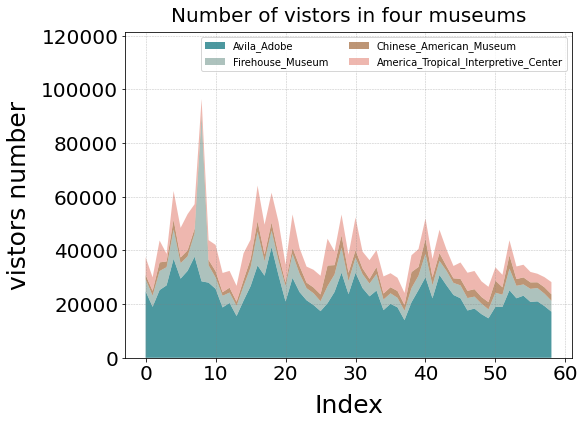

In [ ]:
#Stack area plot
areac=Area_plot()
areac.area(file='museum_visitors_line.csv',x_col_name=['index'],y_col_name=['Avila_Adobe','Firehouse_Museum','Chinese_American_Museum','America_Tropical_Interpretive_Center'],x_label='Index',y_label='vistors number',paper_type='double',plot_type='Stack',title='Number of vistors in four museums',save_image=True,file_name='Area chart')

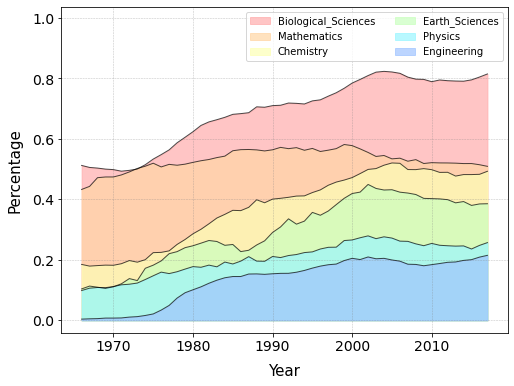

In [ ]:
# Simple area chart
aread=Area_plot()
aread.area(file='women_fraction.xlsx', x_col_name = ['Year'], y_col_name= ['Engineering','Chemistry','Physics','Earth_Sciences','Mathematics','Biological_Sciences'],  
     x_label='Year', y_label='Percentage',paper_type='single',plot_type='Simple',save_image=True,file_name='Area chart')

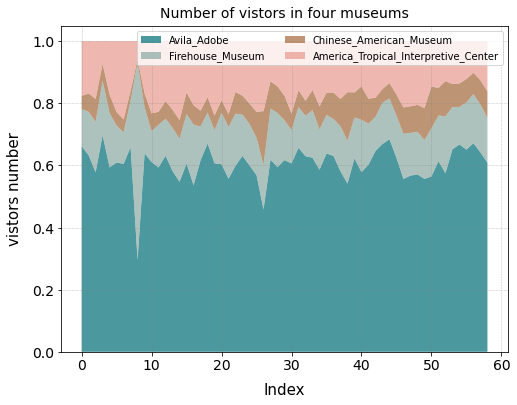

In [ ]:
#Percentage Stacked Area Chart
areac=Area_plot()
areac.area(file='museum_visitors_line.csv',x_col_name=['index'],y_col_name=['Avila_Adobe','Firehouse_Museum','Chinese_American_Museum','America_Tropical_Interpretive_Center'],x_label='Index',y_label='vistors number',plot_type='percentage',paper_type='single',title='Number of vistors in four museums',save_image=True,file_name='Area chart')